# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
# data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

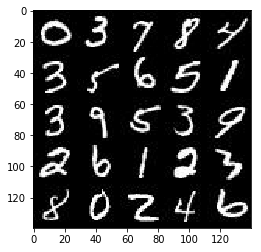

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

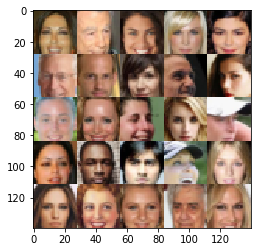

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    
    return inputs_real, inputs_z, learning_rate
#     return None, None, None


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    def leaky_relu(h, alpha):
        return tf.maximum(alpha * h, h)
    
#     def fully_connected_normalized_discriminator(prev_layer, num_units, shape, alpha):
    def fully_connected_normalized_discriminator(prev_layer, input_units):
        
        layer = tf.reshape(prev_layer, shape=(-1, input_units))
        logits = tf.layers.dense(layer, units=1,activation=None)
#         layer = tf.layers.batch_normalization(layer, training=True)
        out = tf.sigmoid(logits)
        return out, logits
        
                            
            
#     def conv2d_normalized(prev_layer, num_units, k_size, strides, training):
    def conv2d_normalized(prev_layer, num_units, k_size, strides, alpha):
                
        layer = tf.layers.conv2d(prev_layer, 
                                 num_units, 
                                 k_size, 
                                 strides, 
                                 padding='same', 
                                 use_bias=False, 
                                 activation=None)
        
#         batch_normalized_output = tf.layers.batch_normalization(layer, training=training)
        batch_normalized_output = tf.layers.batch_normalization(layer, training=True)
                             
        return leaky_relu(batch_normalized_output, alpha)
    
    with tf.variable_scope('discriminator', reuse=reuse):
        
        k_size = 5
        strides = 2
        first_layer_depth = 64
        alpha = 0.2
        
        # Input layer is 32x32x3
        layer_depth = first_layer_depth
        deep_layer = conv2d_normalized(images, 
                                       num_units=layer_depth, 
                                       k_size=k_size, 
                                       strides=strides, 
                                       alpha=alpha)
        # 16x16xfirst_layer_depth now 
        
        layer_depth = int(layer_depth*strides)
        deep_layer = conv2d_normalized(deep_layer, 
                                       num_units=layer_depth, 
                                       k_size=k_size, 
                                       strides=strides, 
                                       alpha=alpha)
        # 8x8x(first_layer_depth*strides) now 
        
        layer_depth = int(layer_depth*strides)
        deep_layer = conv2d_normalized(deep_layer, 
                                       num_units=layer_depth, 
                                       k_size=k_size, 
                                       strides=strides, 
                                       alpha=alpha)
        # 4x4x(first_layer_depth*strides²) now 
                
        final_layer_shape = deep_layer.get_shape().as_list()
#         print("discriminator final_layer_shape = {}".format(final_layer_shape))
        input_units = final_layer_shape[1]*final_layer_shape[2]*final_layer_shape[3]
        out, logits = fully_connected_normalized_discriminator(deep_layer, input_units=input_units)
                
        return out, logits

#     return None, None


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    def leaky_relu(h, alpha):
        return tf.maximum(alpha * h, h)
    
    def fully_connected_normalized_generator(z, num_units, shape, alpha):
        
        x = tf.layers.dense(z, units=num_units,activation=None)
        layer = tf.reshape(x, shape)
        batch_normalized_output = tf.layers.batch_normalization(layer, training=is_train)
        
        return leaky_relu(batch_normalized_output, alpha)
            
    def conv2d_transpose_normalized(prev_layer, num_units, k_size, strides, training, alpha):
                
        layer = tf.layers.conv2d_transpose(prev_layer, 
                                 num_units, 
                                 k_size, 
                                 strides, 
                                 padding='same', 
                                 use_bias=False, 
                                 activation=None)
                                         
        batch_normalized_output = tf.layers.batch_normalization(layer, training=training)
                             
        return leaky_relu(batch_normalized_output, alpha)

    reuse = True if is_train == False else False
    
    with tf.variable_scope('generator', reuse=reuse):
        
        k_size = 5
        strides = 2
        first_layer_depth = 512
        alpha = 0.2
        
        # First fully connected layer
        layer_depth = first_layer_depth
        shape = [-1, 7, 7, layer_depth]
        
        deep_layer = fully_connected_normalized_generator(z, 
                                                 num_units=shape[1]*shape[2]*shape[3], 
                                                 shape=shape, 
                                                 alpha=alpha)                                               
        # 7x7x(first_layer_depth) now
        
        layer_depth = int(layer_depth/strides)
        deep_layer = conv2d_transpose_normalized(deep_layer, 
                                                 num_units=layer_depth, 
                                                 k_size=k_size, 
                                                 strides=strides, 
                                                 training=is_train, 
                                                 alpha=alpha)                        
        # 14x14x(first_layer_depth/strides) now
                
        # Output layer, 28x28x3
        layer_depth = out_channel_dim
        logits = tf.layers.conv2d_transpose(deep_layer, 
                                            filters=layer_depth,  
                                            kernel_size=k_size, 
                                            strides=strides, 
                                            padding='same', 
                                            use_bias=False, 
                                            activation=None) 
        # 28x28xout_channel_dim now         
        
        out = tf.tanh(logits)
        # 28x28xout_channel_dim now 
        
        return out    
#     return None


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss
#     return None, None


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function# Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
        
    return d_train_opt, g_train_opt    
#     return None, None


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [119]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
        
    class GAN:
        def __init__(self, real_size, z_size, learning_rate, beta1=0.5):
#             tf.reset_default_graph()
            
#             print(real_size)

            self.input_real, self.input_z, self.learning_rate = model_inputs(real_size[1],
                                                                             real_size[2], 
                                                                             real_size[3], 
                                                                             z_size)
           
            self.d_loss, self.g_loss = model_loss(self.input_real, 
                                                  self.input_z,
                                                  real_size[3])

            self.d_opt, self.g_opt = model_opt(self.d_loss, self.g_loss, learning_rate, beta1)

    # Create the network
    net = GAN(data_shape, z_dim, learning_rate, beta1=beta1)
    end_of_training = False 
    n_batches = int(data_shape[0]/batch_size)  
    print("Total number of training iterations is {}.".format(n_batches) )
    print()
    
#     # Training goal for Face Generation 
#     training_goal1 = {'ratio_d_g': 2.6,
#                      'loss_g': 0.5, 
#                      'n_steps':  int((5/8)*n_batches)}
#     training_goal2 = {'ratio_d_g': 0.45,
#                      'loss_g': 1.3, 
#                      'n_steps':  int((5/8)*n_batches)}
#     training_goal3 = {'ratio_d_g': 1.5,
#                      'loss_g': 0.8, 
#                      'n_steps':  int((5/8)*n_batches)}

    minimum_iteration = int((8/8)*n_batches)
    # Training goal for Face Generation 
    training_goal1 = {'ratio_d_g': 2.5,
                     'loss_g': 1, 
                     'n_steps':  minimum_iteration}
    training_goal2 = {'ratio_d_g': 20,
                     'loss_g': 5, 
                     'n_steps':  minimum_iteration}
    training_goal3 = {'ratio_d_g': 10,
                     'loss_g': 0.5, 
                     'n_steps':  minimum_iteration}
    
#      # Training goal for Face Generation 
#     training_goal1 = {'ratio_d_g': 2.5,
#                      'loss_g': 1, 
#                      'n_steps':  minimum_iteration}
#     training_goal2 = {'ratio_d_g': 1,
#                      'loss_g': 2.5, 
#                      'n_steps':  minimum_iteration}
#     training_goal3 = {'ratio_d_g': 10,
#                      'loss_g': 0.5, 
#                      'n_steps':  minimum_iteration}
    
    n_images = 25
    print_every = 10
    show_every = 100
#     show_every = 4
    
    saver = tf.train.Saver()
    samples, losses = [], []
    steps = 0    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1

                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(net.d_opt, feed_dict={net.input_real: batch_images, net.input_z: batch_z})
                _ = sess.run(net.g_opt, feed_dict={net.input_z: batch_z, net.input_real: batch_images})

                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = net.d_loss.eval({net.input_z: batch_z, net.input_real: batch_images})
                    train_loss_g = net.g_loss.eval({net.input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))
                    
                    train_ratio_d_g = train_loss_d/train_loss_g   
                    if (
                        (train_ratio_d_g < training_goal1['ratio_d_g'] and 
                        train_loss_g < training_goal1['loss_g'] and 
                        steps > training_goal1['n_steps']) or 
                        
                        (train_ratio_d_g < training_goal2['ratio_d_g'] and 
                        train_loss_g < training_goal2['loss_g'] and 
                        steps > training_goal2['n_steps']) or 
                        
                        (train_ratio_d_g < training_goal3['ratio_d_g'] and 
                        train_loss_g < training_goal3['loss_g'] and 
                        steps > training_goal3['n_steps'])):
                        
                        end_of_training = True
                        
                        print()
                        print("training goal achieved")
                        
                        show_generator_output(sess, 
                                          n_images = n_images, 
                                          input_z = net.input_z, 
                                          out_channel_dim=data_shape[3], 
                                          image_mode=data_image_mode)
                        
                        break
                        
                    

                if steps % show_every == 0:
                    
                    # data_shape = (60000, 28, 28, 1)
                    show_generator_output(sess, 
                                          n_images = n_images, 
                                          input_z = net.input_z, 
                                          out_channel_dim=data_shape[3], 
                                          image_mode=data_image_mode)
            if end_of_training:
                break
                    
        saver.save(sess, './checkpoints/generator_faces.ckpt')
        print("End of training.")

#     with open('samples.pkl', 'wb') as f:
#         pkl.dump(samples, f)
    
#     return losses, samples

                
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.7455... Generator Loss: 1.3202
Epoch 1/2... Discriminator Loss: 2.2170... Generator Loss: 0.2675
Epoch 1/2... Discriminator Loss: 2.9335... Generator Loss: 0.1037
Epoch 1/2... Discriminator Loss: 2.6448... Generator Loss: 0.1140
Epoch 1/2... Discriminator Loss: 2.5640... Generator Loss: 0.1311
Epoch 1/2... Discriminator Loss: 2.1271... Generator Loss: 0.1692
Epoch 1/2... Discriminator Loss: 1.8299... Generator Loss: 0.2442
Epoch 1/2... Discriminator Loss: 1.6885... Generator Loss: 0.2840
Epoch 1/2... Discriminator Loss: 1.6163... Generator Loss: 0.3250
Epoch 1/2... Discriminator Loss: 1.5781... Generator Loss: 0.3212


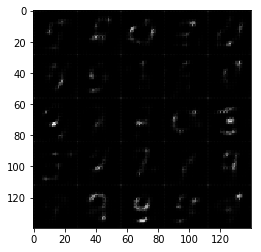

Epoch 1/2... Discriminator Loss: 1.5248... Generator Loss: 0.3616
Epoch 1/2... Discriminator Loss: 1.5038... Generator Loss: 0.3753
Epoch 1/2... Discriminator Loss: 1.4507... Generator Loss: 0.3786
Epoch 1/2... Discriminator Loss: 1.4714... Generator Loss: 0.3670
Epoch 1/2... Discriminator Loss: 1.5029... Generator Loss: 0.3373
Epoch 1/2... Discriminator Loss: 1.4637... Generator Loss: 0.3593
Epoch 1/2... Discriminator Loss: 1.4973... Generator Loss: 0.3770
Epoch 1/2... Discriminator Loss: 1.1347... Generator Loss: 0.6136
Epoch 1/2... Discriminator Loss: 1.3820... Generator Loss: 0.4868
Epoch 1/2... Discriminator Loss: 1.4554... Generator Loss: 0.3983


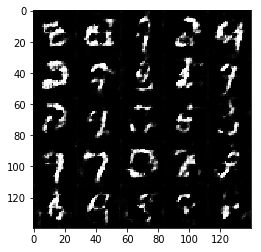

Epoch 1/2... Discriminator Loss: 1.8206... Generator Loss: 0.2768
Epoch 1/2... Discriminator Loss: 1.3337... Generator Loss: 0.4743
Epoch 1/2... Discriminator Loss: 1.2337... Generator Loss: 0.6051
Epoch 1/2... Discriminator Loss: 1.2186... Generator Loss: 0.6306
Epoch 1/2... Discriminator Loss: 1.1938... Generator Loss: 0.6590
Epoch 1/2... Discriminator Loss: 1.6839... Generator Loss: 0.2800
Epoch 1/2... Discriminator Loss: 1.3716... Generator Loss: 0.4547
Epoch 1/2... Discriminator Loss: 1.4322... Generator Loss: 0.4393
Epoch 1/2... Discriminator Loss: 1.6025... Generator Loss: 0.3459
Epoch 1/2... Discriminator Loss: 1.4632... Generator Loss: 0.3780


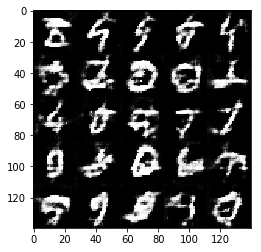

Epoch 2/2... Discriminator Loss: 1.5018... Generator Loss: 0.3611
Epoch 2/2... Discriminator Loss: 1.1974... Generator Loss: 0.6595
Epoch 2/2... Discriminator Loss: 1.2994... Generator Loss: 0.5535
Epoch 2/2... Discriminator Loss: 1.5598... Generator Loss: 1.6636
Epoch 2/2... Discriminator Loss: 1.8386... Generator Loss: 2.2018
Epoch 2/2... Discriminator Loss: 1.1906... Generator Loss: 1.4978
Epoch 2/2... Discriminator Loss: 1.1794... Generator Loss: 1.3391
Epoch 2/2... Discriminator Loss: 1.2760... Generator Loss: 1.3502
Epoch 2/2... Discriminator Loss: 2.0417... Generator Loss: 1.9495
Epoch 2/2... Discriminator Loss: 1.3543... Generator Loss: 0.4102


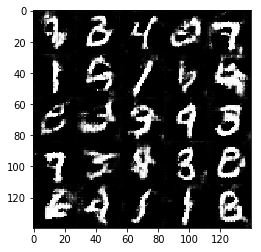

Epoch 2/2... Discriminator Loss: 2.0138... Generator Loss: 0.1765
Epoch 2/2... Discriminator Loss: 1.7732... Generator Loss: 2.0745
Epoch 2/2... Discriminator Loss: 1.2585... Generator Loss: 1.3288
Epoch 2/2... Discriminator Loss: 1.3007... Generator Loss: 0.4738
Epoch 2/2... Discriminator Loss: 1.2343... Generator Loss: 0.4609
Epoch 2/2... Discriminator Loss: 1.2222... Generator Loss: 0.5020
Epoch 2/2... Discriminator Loss: 1.6379... Generator Loss: 0.3609
Epoch 2/2... Discriminator Loss: 1.4342... Generator Loss: 0.3699
Epoch 2/2... Discriminator Loss: 1.3435... Generator Loss: 0.4046
Epoch 2/2... Discriminator Loss: 1.0592... Generator Loss: 0.6296


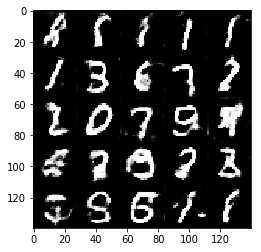

Epoch 2/2... Discriminator Loss: 1.4362... Generator Loss: 0.3805
Epoch 2/2... Discriminator Loss: 1.4727... Generator Loss: 0.4184
Epoch 2/2... Discriminator Loss: 0.8457... Generator Loss: 0.8631
Epoch 2/2... Discriminator Loss: 1.1036... Generator Loss: 0.8074
Epoch 2/2... Discriminator Loss: 1.3648... Generator Loss: 0.8428
Epoch 2/2... Discriminator Loss: 1.1936... Generator Loss: 0.5140
Epoch 2/2... Discriminator Loss: 1.6022... Generator Loss: 0.2701
Epoch 2/2... Discriminator Loss: 1.1170... Generator Loss: 0.7278
Epoch 2/2... Discriminator Loss: 1.0479... Generator Loss: 0.9328
Epoch 2/2... Discriminator Loss: 1.0830... Generator Loss: 1.1237


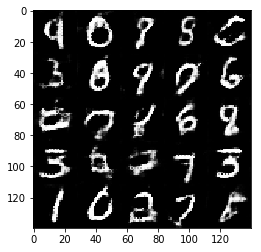

In [102]:
# batch_size = None
# batch_size = 64
# batch_size = 80
# batch_size = 100
# batch_size = 128
# batch_size = 150
batch_size = 200
# batch_size = 300
# batch_size = 400
# batch_size = 256
# z_dim = None

z_dim = 144
# z_dim = 121  ##
# z_dim = 100
# z_dim = 81
# learning_rate = None
# learning_rate = 0.00005
# learning_rate = 0.0001
# learning_rate = 0.0002
# learning_rate = 0.0003
# learning_rate = 0.0004
# learning_rate = 0.00045
# learning_rate = 0.0005
# learning_rate = 0.0006
# learning_rate = 0.0007
# learning_rate = 0.001
# learning_rate = 0.002 ###
# learning_rate = 0.003 ###
# learning_rate = 0.004 ###
# learning_rate = 0.0045 ###
learning_rate = 0.005 #??
# learning_rate = 0.006 #??
# learning_rate = 0.007 #>?
# learning_rate = 0.008 #>?
# learning_rate = 0.009 
# learning_rate = 0.01 # Result No. 1
# learning_rate = 0.0115
# learning_rate = 0.0125
# learning_rate = 0.015
# learning_rate = 0.02 ##
# learning_rate = 0.03
# learning_rate = 0.04
# beta1 = None
# beta1 = 0.2
# beta1 = 0.25
beta1 = 0.3 #####
# beta1 = 0.35 
# beta1 = 0.4
# beta1 = 0.45
# beta1 = 0.5
# beta1 = 0.55
# beta1 = 0.6


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Total number of training iterations is 810.

Epoch 1/1... Discriminator Loss: 1.3497... Generator Loss: 0.6421
Epoch 1/1... Discriminator Loss: 1.0418... Generator Loss: 0.8045
Epoch 1/1... Discriminator Loss: 0.8068... Generator Loss: 1.1826
Epoch 1/1... Discriminator Loss: 0.7810... Generator Loss: 1.2892
Epoch 1/1... Discriminator Loss: 0.8178... Generator Loss: 1.4243
Epoch 1/1... Discriminator Loss: 0.8295... Generator Loss: 1.2465
Epoch 1/1... Discriminator Loss: 0.6134... Generator Loss: 1.5575
Epoch 1/1... Discriminator Loss: 0.5684... Generator Loss: 1.6965
Epoch 1/1... Discriminator Loss: 0.6014... Generator Loss: 1.5415
Epoch 1/1... Discriminator Loss: 0.5401... Generator Loss: 1.8380


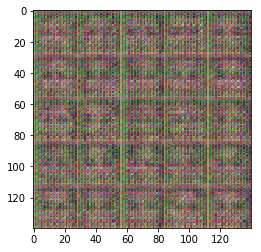

Epoch 1/1... Discriminator Loss: 0.4177... Generator Loss: 1.8050
Epoch 1/1... Discriminator Loss: 0.4533... Generator Loss: 1.7679
Epoch 1/1... Discriminator Loss: 0.6449... Generator Loss: 1.6037
Epoch 1/1... Discriminator Loss: 0.8770... Generator Loss: 1.3464
Epoch 1/1... Discriminator Loss: 0.8169... Generator Loss: 1.4489
Epoch 1/1... Discriminator Loss: 0.8715... Generator Loss: 1.3368
Epoch 1/1... Discriminator Loss: 0.8877... Generator Loss: 1.2596
Epoch 1/1... Discriminator Loss: 0.7997... Generator Loss: 1.3341
Epoch 1/1... Discriminator Loss: 0.7096... Generator Loss: 1.4576
Epoch 1/1... Discriminator Loss: 0.7978... Generator Loss: 1.4619


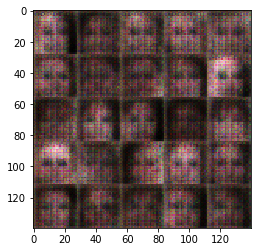

Epoch 1/1... Discriminator Loss: 0.6094... Generator Loss: 1.6303
Epoch 1/1... Discriminator Loss: 0.9203... Generator Loss: 1.2072
Epoch 1/1... Discriminator Loss: 0.6954... Generator Loss: 1.3853
Epoch 1/1... Discriminator Loss: 0.8038... Generator Loss: 1.3687
Epoch 1/1... Discriminator Loss: 0.8015... Generator Loss: 1.3985
Epoch 1/1... Discriminator Loss: 0.8049... Generator Loss: 1.2409
Epoch 1/1... Discriminator Loss: 0.6257... Generator Loss: 1.4931
Epoch 1/1... Discriminator Loss: 0.6603... Generator Loss: 1.5631
Epoch 1/1... Discriminator Loss: 0.6380... Generator Loss: 1.4595
Epoch 1/1... Discriminator Loss: 0.6428... Generator Loss: 1.4346


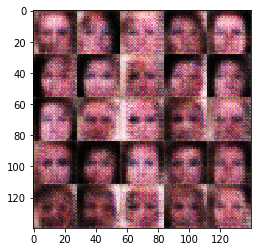

Epoch 1/1... Discriminator Loss: 0.6121... Generator Loss: 1.6128
Epoch 1/1... Discriminator Loss: 0.7045... Generator Loss: 1.4384
Epoch 1/1... Discriminator Loss: 0.6533... Generator Loss: 1.7609
Epoch 1/1... Discriminator Loss: 0.8542... Generator Loss: 1.1304
Epoch 1/1... Discriminator Loss: 0.6302... Generator Loss: 1.5083
Epoch 1/1... Discriminator Loss: 0.7321... Generator Loss: 1.3208
Epoch 1/1... Discriminator Loss: 0.7115... Generator Loss: 1.3399
Epoch 1/1... Discriminator Loss: 0.5602... Generator Loss: 1.6389
Epoch 1/1... Discriminator Loss: 0.7178... Generator Loss: 1.2367
Epoch 1/1... Discriminator Loss: 0.6675... Generator Loss: 1.5507


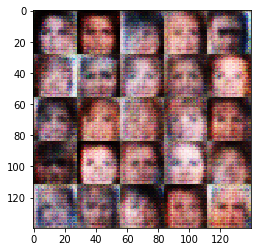

Epoch 1/1... Discriminator Loss: 0.6914... Generator Loss: 1.3018
Epoch 1/1... Discriminator Loss: 0.5794... Generator Loss: 1.5221
Epoch 1/1... Discriminator Loss: 0.5663... Generator Loss: 1.5917
Epoch 1/1... Discriminator Loss: 0.5617... Generator Loss: 1.4918
Epoch 1/1... Discriminator Loss: 0.4367... Generator Loss: 1.8530
Epoch 1/1... Discriminator Loss: 0.5266... Generator Loss: 1.7621
Epoch 1/1... Discriminator Loss: 0.5971... Generator Loss: 1.2506
Epoch 1/1... Discriminator Loss: 0.4712... Generator Loss: 1.6270
Epoch 1/1... Discriminator Loss: 0.5604... Generator Loss: 1.2767
Epoch 1/1... Discriminator Loss: 0.4136... Generator Loss: 2.2099


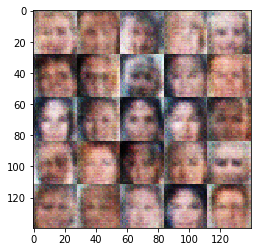

Epoch 1/1... Discriminator Loss: 0.4927... Generator Loss: 1.8252
Epoch 1/1... Discriminator Loss: 0.4967... Generator Loss: 2.0212
Epoch 1/1... Discriminator Loss: 0.5297... Generator Loss: 2.1910
Epoch 1/1... Discriminator Loss: 0.7245... Generator Loss: 1.0281
Epoch 1/1... Discriminator Loss: 0.6915... Generator Loss: 1.2909
Epoch 1/1... Discriminator Loss: 0.6061... Generator Loss: 1.3433
Epoch 1/1... Discriminator Loss: 0.4499... Generator Loss: 1.9592
Epoch 1/1... Discriminator Loss: 0.8059... Generator Loss: 0.8600
Epoch 1/1... Discriminator Loss: 0.6961... Generator Loss: 1.6224
Epoch 1/1... Discriminator Loss: 0.8347... Generator Loss: 1.0364


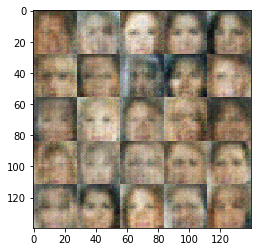

Epoch 1/1... Discriminator Loss: 0.9473... Generator Loss: 0.7671
Epoch 1/1... Discriminator Loss: 0.7821... Generator Loss: 1.1004
Epoch 1/1... Discriminator Loss: 0.9925... Generator Loss: 0.7630
Epoch 1/1... Discriminator Loss: 0.8132... Generator Loss: 1.2272
Epoch 1/1... Discriminator Loss: 0.8376... Generator Loss: 0.9752
Epoch 1/1... Discriminator Loss: 0.9665... Generator Loss: 1.1483
Epoch 1/1... Discriminator Loss: 0.8914... Generator Loss: 0.9199
Epoch 1/1... Discriminator Loss: 0.8220... Generator Loss: 1.1560
Epoch 1/1... Discriminator Loss: 0.7026... Generator Loss: 1.4404
Epoch 1/1... Discriminator Loss: 0.5444... Generator Loss: 1.6077


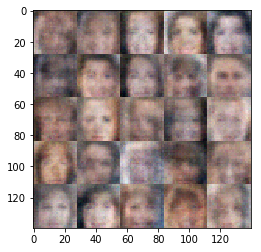

Epoch 1/1... Discriminator Loss: 0.8775... Generator Loss: 1.0710
Epoch 1/1... Discriminator Loss: 0.7284... Generator Loss: 1.2562
Epoch 1/1... Discriminator Loss: 0.8083... Generator Loss: 0.9514
Epoch 1/1... Discriminator Loss: 1.0188... Generator Loss: 0.8101
Epoch 1/1... Discriminator Loss: 0.7967... Generator Loss: 1.1135
Epoch 1/1... Discriminator Loss: 0.7263... Generator Loss: 1.0923
Epoch 1/1... Discriminator Loss: 0.9992... Generator Loss: 0.8612
Epoch 1/1... Discriminator Loss: 1.0522... Generator Loss: 0.7488
Epoch 1/1... Discriminator Loss: 0.9475... Generator Loss: 1.2231
Epoch 1/1... Discriminator Loss: 1.1267... Generator Loss: 0.9223


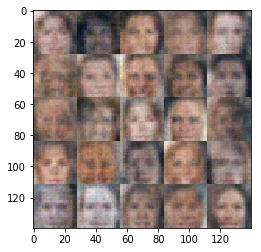

Epoch 1/1... Discriminator Loss: 0.8108... Generator Loss: 1.2668
End of training.


In [145]:
# batch_size = None
# batch_size = 200
batch_size = 250
# batch_size = 400
# batch_size = 500
# batch_size = 800
# z_dim = None
z_dim = 100
# z_dim = 144
# z_dim = 169
# z_dim = 196
# z_dim = 256
# z_dim = 400 
# z_dim = 576 
# z_dim = 625
# z_dim = 900
# z_dim = 1024


# learning_rate = 0.000001 #####
# learning_rate = 0.00001 #####
# learning_rate = 0.000015 #####
# learning_rate = 0.00002 #####
# learning_rate = 0.00003 #####
# learning_rate = 0.00004 #####
learning_rate = 0.00005 #####
# learning_rate = 0.00006 #####
# learning_rate = 0.00008 #####
# learning_rate = 0.0001 #####
# learning_rate = 0.00012 #####
# learning_rate = 0.00013 #####
# learning_rate = 0.00014 #####
# learning_rate = 0.00015 #####
# learning_rate = 0.00017 #####
# learning_rate = 0.000175 #####
# learning_rate = 0.00018 #####################3
# learning_rate = 0.00018125 #####
# learning_rate = 0.0001875 #####
# learning_rate = 0.00019 #####
# learning_rate = 0.0002 #####
# learning_rate = 0.000205 #####
# learning_rate = 0.00021 #####
# learning_rate = 0.00022 #####
# learning_rate = 0.000215 #####
# learning_rate = 0.000225
# learning_rate = 0.00023125 #####
# learning_rate = 0.00025
# learning_rate = 0.0003 #####
# learning_rate = 0.0004 #####
# learning_rate = 0.00045 #####
# learning_rate = 0.00046 #####
# learning_rate = 0.00047 #####
# learning_rate = 0.00048 #####
# learning_rate = 0.0005 #####
# learning_rate = 0.0006 #####
# learning_rate = 0.00065
# learning_rate = 0.0007
# learning_rate = 0.0008 #####
# learning_rate = 0.00085 #####
# learning_rate = 0.0009 #####
# learning_rate = 0.001
# learning_rate = 0.0013
# learning_rate = 0.002 ###############################1 ### BEST
# learning_rate = 0.003 ###############################2 
# learning_rate = 0.004
# learning_rate = 0.005

# beta1 = None
# beta1 = 0.3 ### TESTAR
# beta1 = 0.4 ### TESTAR
# beta1 = 0.5 ### TESTAR
# beta1 = 0.53 ### TESTAR
# beta1 = 0.55 ### TESTAR
# beta1 = 0.58 ### TESTAR
# beta1 = 0.6 ############################################################## 
# beta1 = 0.61
# beta1 = 0.62
# beta1 = 0.63
# beta1 = 0.64
# beta1 = 0.65
# beta1 = 0.6636
# beta1 = 0.67
# beta1 = 0.6705
# beta1 = 0.671
# beta1 = 0.672
# beta1 = 0.675
# beta1 = 0.68 # d_loss=1.5; g_loss=0.5
# beta1 = 0.69
# beta1 = 0.7 ##############################################################1/2 # BEST
# beta1 = 0.71 
# beta1 = 0.72
# beta1 = 0.73
beta1 = 0.74
# beta1 = 0.75
# beta1 = 0.765
# beta1 = 0.77
# beta1 = 0.78
# beta1 = 0.79
# beta1 = 0.8
# beta1 = 0.85
# beta1 = 0.9
# beta1 = 0.95

####################################################
# OBS: Proximos testes ---> aumentar beta1 e MANTER learning rate

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.